In [1]:
!pip install torch

In [0]:
import torch
from torch.nn import Linear
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'x')

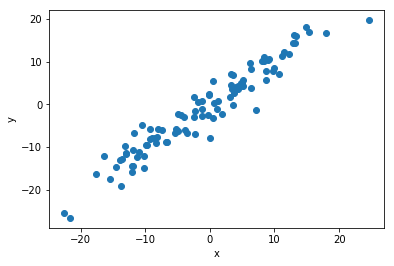

In [3]:
X = torch.randn(100, 1) * 10
Y = X + torch.randn(100, 1) * 3

plt.scatter(X.numpy(), Y.numpy(), marker="o")
plt.ylabel("y")
plt.xlabel("x")


In [0]:
w  = torch.tensor(3.0, requires_grad = True)
b = torch.tensor(1.0, requires_grad = True)

In [0]:
def forward(x):
  y = w * x + b
  return y

In [6]:
x = torch.tensor([[4], [7]])
forward(x)

tensor([[13],
        [22]], grad_fn=<AddBackward0>)

In [7]:
# random seed
torch.manual_seed(1)
model = Linear(in_features=1, out_features=1) #linear modelが構築される
print(model.bias, model.weight)

Parameter containing:
tensor([-0.4414], requires_grad=True) Parameter containing:
tensor([[0.5153]], requires_grad=True)


In [8]:
x = torch.tensor([[1.0], [2.0]])
print(model(x))

tensor([[0.0739],
        [0.5891]], grad_fn=<AddmmBackward>)


In [0]:
import torch.nn as nn
# 自分でモデルを作る
# nn.Moduleはあらゆるneural networkのスーパークラス
class LR(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear = nn.Linear(in_features=input_size, out_features=output_size)  
    def forward(self, x):
        pred = self.linear(x)
        return pred

In [10]:
torch.manual_seed(1)
model = LR(1, 1)
# print(list(model.parameters()))
print(model)

LR(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


In [11]:
x = torch.tensor([[1.0], [2.0]])
print(model.forward(x))

tensor([[0.0739],
        [0.5891]], grad_fn=<AddmmBackward>)


In [12]:
w, b = model.parameters()
print(w, b)
w1 = w[0][0].item() #tensorの値を取り出す
b1 = b[0].item()
print(w1, b1)

def get_params():
  return (w[0][0].item(), b[0].item())

Parameter containing:
tensor([[0.5153]], requires_grad=True) Parameter containing:
tensor([-0.4414], requires_grad=True)
0.5152631998062134 -0.44137823581695557


In [0]:
def plot_fit(title):
  plt.title = title
  w1, b1 = get_params()
  x1= np.array([-30, 30])
  y1 = w1 * x1 + b1
  plt.plot(x1, y1, "r")
  plt.scatter(X, Y)
  plt.show()

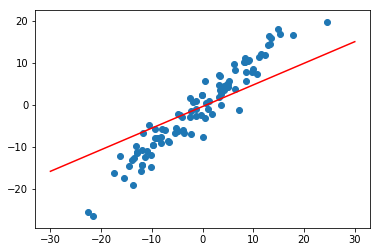

In [14]:
plot_fit("initial model")

In [0]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [17]:
epochs = 100
losses = []
for i in range(epochs):
  y_pred = model.forward(X)
  loss = criterion(y_pred, Y)
  print("epoch:{}, loss: {}".format(i, loss.item()))
  
  losses.append(loss)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

epoch:0, loss: 28.617589950561523
epoch:1, loss: 22.001680374145508
epoch:2, loss: 17.428199768066406
epoch:3, loss: 14.26628303527832
epoch:4, loss: 12.079946517944336
epoch:5, loss: 10.567862510681152
epoch:6, loss: 9.521791458129883
epoch:7, loss: 8.797821998596191
epoch:8, loss: 8.296496391296387
epoch:9, loss: 7.949077606201172
epoch:10, loss: 7.708056449890137
epoch:11, loss: 7.540605068206787
epoch:12, loss: 7.4240288734436035
epoch:13, loss: 7.342647552490234
epoch:14, loss: 7.28562068939209
epoch:15, loss: 7.245455265045166
epoch:16, loss: 7.216971397399902
epoch:17, loss: 7.196590900421143
epoch:18, loss: 7.1818366050720215
epoch:19, loss: 7.17099666595459
epoch:20, loss: 7.162887096405029
epoch:21, loss: 7.1566877365112305
epoch:22, loss: 7.151833534240723
epoch:23, loss: 7.14793062210083
epoch:24, loss: 7.144705295562744
epoch:25, loss: 7.141970157623291
epoch:26, loss: 7.139593601226807
epoch:27, loss: 7.137483596801758
epoch:28, loss: 7.135575771331787
epoch:29, loss: 7.1

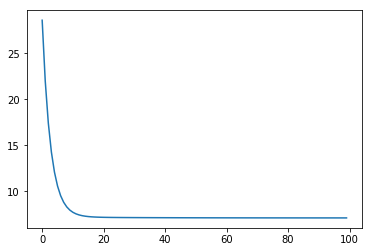

In [18]:
plt.plot(range(epochs), losses)

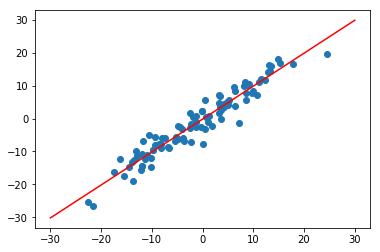

In [19]:
plot_fit("Trained_Model")